# Data Project - GDP Per Capita & Press Freedom Rank

Data Project

GDP Data taken from  [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-worldbank?year=2016)

In [219]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
from pandas import DataFrame
import os
import fiona


In [220]:
if os.path.isfile("gdp-per-capita-worldbank.csv"):
    filepath = "gdp-per-capita-worldbank.csv"
    print("loaded gdp dataset")
    filepath2 = "free press.csv"
    print("loaded fp dataset")
else:
    None
    print("Not loaded")

gdp_data = pd.read_csv(filepath)
fp_data = pd.read_csv(filepath2)
print("done")

loaded gdp dataset
loaded fp dataset
done


In [221]:
#Grabs the (x) entry of the csv file
# gdp_data.columns <-- does same thing without data
gdp_data.head(2)

,Entity,Code,Year,GDP per capita (int.-$) (constant 2011 international $)
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507


In [222]:
#Displays 1 entry
row_one = gdp_data.iloc[1]
row_one

Entity                                                     Afghanistan
Code                                                               AFG
Year                                                              2003
GDP per capita (int.-$) (constant 2011 international $)        1099.19
Name: 1, dtype: object

In [223]:
row_one["Year"]

2003

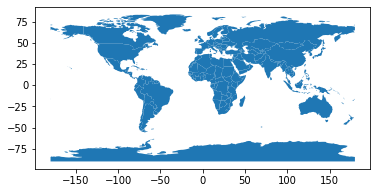

In [224]:
#Displays empty map
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot()

In [225]:
#Displays graph data of world
# world.iloc[1]
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [226]:
#Restructing Dataset
world_condensed = world[['pop_est', 'continent', 'name', 'geometry']]
world_condensed.head(3)

,pop_est,continent,name,geometry
0,920938,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [227]:
# world = world[(world.pop_est>0) & (world.name!="Antarctica")]
# world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# world.plot(column='gdp_per_cap')


In [228]:
# df = pd.read_csv("gdp-per-capita-worldbank.csv", header=0)
# df.head()
gdp_data.head(2)

,Entity,Code,Year,GDP per capita (int.-$) (constant 2011 international $)
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507


In [229]:
#DEFINING DATASET - Removed 'Code' from set
gdp_data = gdp_data[['Entity', 'Year', 'GDP per capita (int.-$) (constant 2011 international $)']]

In [230]:
#RENAME AND RESTRUCTURING DATASET
data_for_map = gdp_data.rename(index=str, columns={
    "Entity": "Country",
    "GDP per capita (int.-$) (constant 2011 international $)": "GDP",
    "Year": "Year",
})

data_for_map.head()

,Country,Year,GDP
0,Afghanistan,2002,1063.635574
1,Afghanistan,2003,1099.194507
2,Afghanistan,2004,1062.249360
3,Afghanistan,2005,1136.123214
4,Afghanistan,2006,1161.124889


In [231]:
#Joining geopandas with dataset
#merging name from world_condensed & country from data for map 
merged = world_condensed.set_index('name').join(data_for_map.set_index('Country'))

merged.head()

,pop_est,continent,geometry,Year,GDP
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2002.0,1063.635574
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2003.0,1099.194507
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2004.0,1062.249360
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2005.0,1136.123214
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2006.0,1161.124889


In [232]:
#YEAR SPECIFIC

df_2011 = merged[merged['Year'] == 2011]
df_2011.head()

,pop_est,continent,geometry,Year,GDP
Afghanistan,34124811,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2011.0,1660.739856
Albania,3047987,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2011.0,10207.764699
Algeria,40969443,Africa,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",2011.0,12990.345016
Angola,29310273,Africa,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",2011.0,5911.254092
Argentina,44293293,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",2011.0,19629.351845


In [233]:
# merged = merged[[]]

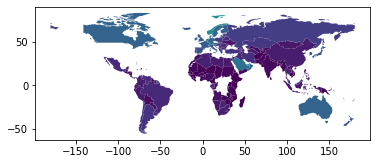

In [234]:
# world2 = world[(world.pop_est>0) & (world.name!="Antarctica")]


# world2['gdp_per_cap']

# world.plot('gdp_per_cap')
df_2011.plot('GDP')

pop_est                                               34124811
continent                                                 Asia
geometry     POLYGON ((66.51860680528867 37.36278432875879,...
Year                                                      2002
GDP                                                    1063.64
Name: Afghanistan, dtype: object


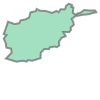

In [235]:
a = merged.iloc[0]
print(a)
a.geometry

In [236]:
search_data = data_for_map[data_for_map['Country'].str.match('Australia')]
search_data

,Country,Year,GDP
213,Australia,1990,28658.365890
214,Australia,1991,28185.752900
215,Australia,1992,27969.066117
216,Australia,1993,28815.462980
217,Australia,1994,29646.419265
218,Australia,1995,30412.078055
219,Australia,1996,31179.307874
220,Australia,1997,32055.385059
221,Australia,1998,33174.907653
222,Australia,1999,34443.866178


In [237]:
search_data2 = data_for_map[data_for_map['Country'].str.match('Philippines')]

#Graph Data

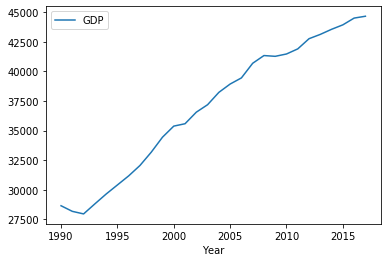

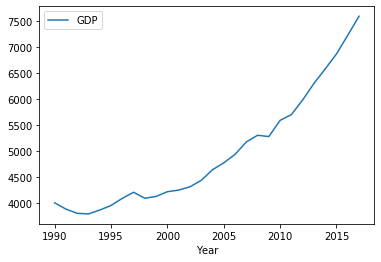

In [238]:
#  search_data["Year"][data_for_map["GDP"] < 300000].hist()
linedata = DataFrame(search_data,columns=["Year", "GDP"])
linedata2 = DataFrame(search_data2,columns=["Year", "GDP"])
linedata.plot(x='Year', y='GDP', kind='line')
linedata2.plot(x='Year', y='GDP', kind='line')
plt.show()


In [239]:
fp_data.head()

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,NaN,-122.00,-121.00,-118.00,-120.00,-120.00,-122,-128.00,-128.00,-150,-147.00,-149.00,-156.00,-142.0,-130.00,-125.00,-97.00,-134.00,-104
1,Afghanistan,37.70,36.55,37.28,39.46,37.75,37.44,37.07,37.36,74,51.67,54.25,59.25,56.5,44.25,39.17,28.25,40.17,35.50v
2,NaN,-84.00,-82.00,-75.00,-76.00,-82.00,-82,-85.00,-102.00,-96,-80.00,-88.00,-79.00,-87.0,-80.00,-62.00,-50.00,-34.00,NaN
3,Albania,30.25,29.84,29.49,29.92,29.92,28.77,29.92,30.88,34.44,21.50,21.75,16.00,25.5,18.00,14.17,11.50,6.50,NaN
4,NaN,-146.00,-141.00,-136.00,-134.00,-129.00,-119,-121.00,-125.00,-122,-133.00,-141.00,-121.00,-123.0,-126.00,-129.00,-128.00,-108.00,-95


In [249]:
fp_data = fp_data.drop(fp_data.index[0])
fp_data_fix = fp_data.iloc[::2,:]
fp_data_fix.head()

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,2010,2009,2008,2007,2006,2005,2004,2003,2002
1,Afghanistan,37.70,36.55,37.28,39.46,37.75,37.44,37.07,37.36,74,51.67,54.25,59.25,56.5,44.25,39.17,28.25,40.17,35.50v
3,Albania,30.25,29.84,29.49,29.92,29.92,28.77,29.92,30.88,34.44,21.50,21.75,16.00,25.5,18.00,14.17,11.50,6.50,NaN
5,Algeria,45.52,45.75,43.13,42.83,41.69,36.63,36.26,36.54,56,47.33,49.56,31.33,40.5,40.00,40.33,43.50,33.00,31
7,Andorra,23.23,24.63,22.21,21.03,19.87,19.87,6.82,6.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Angola,33.92,34.96,38.36,40.42,39.89,37.84,36.50,37.80,58.43,28.50,36.50,29.50,26.5,21.50,18.00,26.50,28.00,30.17


In [254]:
search_data_fp = fp_data_fix[fp_data_fix['Country'].str.match('Afghanistan')]
search_data_fp

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,2010,2009,2008,2007,2006,2005,2004,2003,2002


In [262]:
search_data_fp.iloc[0]


IndexError: single positional indexer is out-of-bounds

In [258]:
df_2011_fp = fp_data_fix[fp_data_fix['Year'] == 2011]
df_2011_fp

KeyError: 'Year'